In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

In [44]:
# Read in the east coast GDP CSV
csv_file = pd.read_csv('https://media.githubusercontent.com/media/deirdrebclark/Project1/master/output_data/GDP_East.csv', thousands=',')
east_data = pd.DataFrame(csv_file)
east_data
east_data.columns = ['State', '2014', '2015', '2016', '2017', '2018']

# Sum total of east coast GDP per year
east_sum = east_data.sum()

# Read in the west coast GDP CSV
csv_file = pd.read_csv('https://media.githubusercontent.com/media/deirdrebclark/Project1/master/output_data/GDP_West.csv', thousands=',')
west_data = pd.DataFrame(csv_file)
west_data.columns = ['State', '2014', '2015', '2016', '2017', '2018']

# Sum total of west coast GDP per year
west_sum = west_data.sum()
west_df = pd.DataFrame(west_sum)

# Combine the two into a total GDP summary table
sum_df = pd.DataFrame(east_sum)
sum_df.columns = ['East Coast']
sums_df = sum_df.join(west_df)
sums_df.columns = ['East Coast', 'West Coast']
sums_df = sums_df.T
del sums_df['State']
sums_df

# Transform GDP Summary table for readability
sums_df = sums_df.T
sums_df

,East Coast,West Coast
2014,7.86439e+06,3.15962e+06
2015,8.15827e+06,3.36061e+06
2016,8.36352e+06,3.49941e+06
2017,8.72348e+06,3.71178e+06
2018,9.19033e+06,3.95188e+06


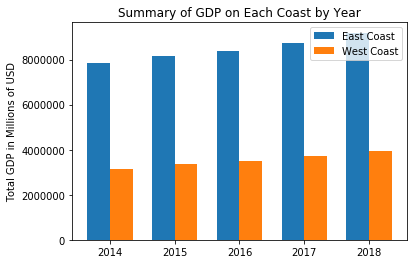

In [7]:
# Summary East v West coast bar plot

labels = ['2014', '2015', '2016', '2017', '2018']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sums_df['East Coast'], width, label='East Coast')
rects2 = ax.bar(x + width/2, sums_df['West Coast'], width, label='West Coast')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total GDP in Millions of USD')
ax.set_title('Summary of GDP on Each Coast by Year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [20]:
# Look at pollution data
csv_file = pd.read_csv('https://media.githubusercontent.com/media/deirdrebclark/Project1/master/output_data/Bicoastal_Litter.csv')
litter_df = pd.DataFrame(csv_file)

In [24]:
litter_df
#del litter_df['Unnamed: 0']
east_lit = litter_df.loc[litter_df['level_0'] == 'East Coast']
west_lit = litter_df.loc[litter_df['level_0'] == 'West Coast']
west_lit

,level_0,State,Plastic Waste,Foam Waste,Fisherman's Waste,Smoking Waste Items,Misc Food Waste Items,Miscellaneous Waste Items
0,West Coast,"Alaska, USA",17089,17001,4451,11356,10504,13506.0
1,West Coast,"California, USA",1513814,439899,45287,838130,646930,463359.0
2,West Coast,"Hawaii, USA",162594,27640,22564,92206,44719,46293.0
3,West Coast,"Oregon, USA",109147,23946,4098,29913,18316,14395.0
4,West Coast,"Washington, USA",98557,40371,10013,67107,40412,41235.0


In [54]:
east_data
east_lit['State'] = ['AL', 'CT', 'DE', 'FL', 'GA', 'LA', 'ME', 'MD', 'MA', 'MS', 'NH', 'NJ', 'NY', 'NC', 'RI', 'SC', 'TX', 'VA']
east_lit
east_df = east_data.sort_values('State')
east_litt = east_lit.sort_values('State')

C:\Users\chtho\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


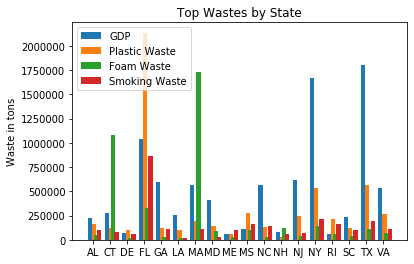

In [87]:
labels = east_df['State']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3*width/4, east_df['2018'], width, label='GDP')
rects2 = ax.bar(x + width/4, east_litt['Plastic Waste'], width, label='Plastic Waste')
rects3 = ax.bar(x + 3*width/4, east_litt['Foam Waste'], width, label='Foam Waste')
rects3 = ax.bar(x + 6*width/4, east_litt["Smoking Waste Items"], width, label='Smoking Waste')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Waste in tons')
ax.set_title('Top Wastes by State')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [77]:
# Open coastline CSV
csv_file = pd.read_csv("https://media.githubusercontent.com/media/deirdrebclark/Project1/master/Resources/coastline.csv", thousands=",")
coast_df = pd.DataFrame(csv_file)

# Format the coastline Dataframe
coast_df.columns = ['State', 'Coastline']
coast_df['Coastline'] = coast_df['Coastline'].str.strip(' mi')
coast_df['Coastline'] = coast_df['Coastline'].str.replace(',' , '')
coast_df['Coastline'] = coast_df['Coastline'].astype(int)
coast_df = coast_df.sort_values('State')
coast_df['State'] = ['AL', 'AK', 'CA', 'CT', 'DE', 'FL', 'GA', 'HI', 'LA', 'ME', 'MD', 'MA', 'MS', 'NH', 'NJ', 'NY', 'NC', 'OR', 'RI', 'SC', 'TX', 'VA', 'WA']

In [90]:
east_state = ['AL', 'CT','DE','FL','GA','LA','ME','MD','MA','MS','NH','NJ','NY','NC','RI','SC','TX', 'VA']
east_coast = coast_df[coast_df.State.isin(east_state)]
east_coast

,State,Coastline
17,AL,607
16,CT,618
21,DE,381
1,FL,8436
15,GA,2344
4,LA,7721
8,ME,3478
20,MD,3190
9,MA,1519
18,MS,359


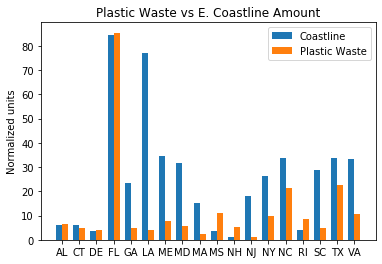

In [102]:
# Barplot for coastline values
labels = east_coast['State']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, east_coast['Coastline']/100, width, label='Coastline')
rects2 = ax.bar(x + width/2, east_litt['Plastic Waste']/25000, width, label='Plastic Waste')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Normalized units')
ax.set_title('Plastic Waste vs E. Coastline Amount')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()